# Tarea Pandas

Nicolò Trevisani

In [1]:
import numpy as np
import pandas as pd

## Archivo CSV

In [2]:
# Leo el dataset y miro su formato

df = pd.read_csv('Centroides_NucleosPoblacion.csv')
df.head()

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y
0,0,1,35002000101,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,35003000201,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,35004000301,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,35006000202,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,35009000303,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100000 habitantes?. ¿Cuál es la segunda ciudad más poblada?. ¿Qué posición ocupa Granada en el ranking de las más pobladas?.

In [3]:
# Número de Municipios con más de cien mil habitantes
len(df[df.Poblacion > 100000])

62

In [4]:
# Segunda ciudad más poblada
df.sort_values(by=['Poblacion'], ascending = False)[1:2].Municipio.values[0]

'Barcelona'

In [5]:
# Posición que ocupa Granada
df2 = df.sort_values(by=['Poblacion'], ascending = False).reset_index()
df2[df2.Municipio == "Granada"].index.values[0] + 1 # Sumo 1 porque el primer índice es 0

18

2) Escriba los nombres de los 10 municipios con menos población.

In [6]:
df.sort_values(by=['Poblacion'])[0:10].Municipio

307         Zumarraga
115    Caldas de Reis
168           Amurrio
746    Premià de Dalt
525             Buñol
97           Bembibre
503             Ocaña
193               Sax
841     San Fulgencio
756     San Bartolomé
Name: Municipio, dtype: object

3) ¿Cuántos municipios de León tienen más de 6000 habitantes?.

In [7]:
len(df[df.Provincia == 'León'].Poblacion > 6000)

9

4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [8]:
mun_norte  = df.loc[df.Y.idxmax(axis = 1)].Municipio
prov_norte = df.loc[df.Y.idxmax(axis = 1)].Provincia

print("El municipio más al norte es {0} y se encuentra en la provincia de {1}".format(mun_norte,prov_norte))

El municipio más al norte es Viveiro y se encuentra en la provincia de Lugo


5) ¿Cual es el municipio de la provincia de Cantabria situado más al Este?. ¿Cual es el situado más al Oeste?.

In [9]:
mun_este = df.loc[df[df.Provincia == "Cantabria"].X.idxmax()].Municipio
mun_oeste = df.loc[df[df.Provincia == "Cantabria"].X.idxmin()].Municipio

print("El municipio más al este de Cantabria es {0}, el más el oeste es {1}".format(mun_este,mun_oeste))

El municipio más al este de Cantabria es Castro-Urdiales, el más el oeste es Reinosa


6) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. Por supuesto, Madrid no cuenta.

In [10]:
# Defino las coordenadas de Madrid
x_madrid = df[df.Municipio == 'Madrid'].X.values
y_madrid = df[df.Municipio == 'Madrid'].Y.values

# Anado la columna 'dist_madrid', con las distancia euclideas de 
# los municipios con respecto a Madrid
df['dist_Madrid'] = (df.X - x_madrid)**2 + (df.Y - y_madrid)**2

# Cross-check: quiero que la distancia de Madrid con Madrid sea 0
df[df.Municipio == 'Madrid']

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y,dist_Madrid
355,355,356,28079000101,Madrid,3273049.0,28079,Madrid,28,Madrid,-3.703797,40.41663,0.0


In [11]:
# Ahora los resultados
far = df.loc[df['dist_Madrid'].idxmax()].Municipio
close = df.sort_values(by=['dist_Madrid'])[1:2].Municipio.values[0]

print("El municipio más cercano a Madrid es {0}, el más lejano es {1}".format(close, far))

El municipio más cercano a Madrid es Pozuelo de Alarcón, el más lejano es Los Llanos de Aridane


7) ¿Cuántos Municipios hay en un radio de 5 grados de la ciudad de Barcelona?

In [12]:
# Defino las coordenadas de Barcelona
x_barcelona = df[df.Municipio == 'Barcelona'].X.values
y_barcelona = df[df.Municipio == 'Barcelona'].Y.values

# Anado la columna 'dist_barcelona', con las distancia euclideas de 
# los municipios con respecto a Barcelona
df['dist_Barcelona'] = (df.X - x_barcelona)**2 + (df.Y - y_barcelona)**2

# Cross-check: quiero que la distancia de Barcelona con Barcelona sea 0
df[df.Municipio == 'Barcelona']

,FID,OBJECTID,Cod_INE,Texto,Poblacion,CodMun,Municipio,Cod_Provin,Provincia,X,Y,dist_Madrid,dist_Barcelona
623,623,624,8019000101,Barcelona,1619337.0,8019,Barcelona,8,Barcelona,2.176349,41.384247,35.512403,0.0


In [13]:
# Ahora los resultados
len(df[df['dist_Barcelona'] < 5])

155

8) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Cantabria.

In [14]:
pobl_cantabria = df[df.Provincia == "Cantabria"].Poblacion

print("Población en Cantabria:")

print("Valor medio: %2d" %(pobl_cantabria.mean()))
print("Mediana: %2d" %(pobl_cantabria.median()))
print("Desviación típica: %2d" %(pobl_cantabria.std()))

print("Valor máximo: %2d" %(pobl_cantabria.max()))
print("Valor mínimo: %2d" %(pobl_cantabria.min()))

Población en Cantabria:
Valor medio: 31246
Mediana: 14322
Desviación típica: 45088
Valor máximo: 181589
Valor mínimo: 10277


9) Usando los métodos de agregación, calcular las poblaciones de cada provincia.

In [15]:
df.groupby('Provincia').Poblacion.sum()

Provincia
A Coruña                   818982.0
Alacant/Alicante          1804252.0
Albacete                   280673.0
Almería                    550604.0
Asturias                   965777.0
Badajoz                    361700.0
Barcelona                 4934795.0
Burgos                     250766.0
Cantabria                  437448.0
Castelló/Castellón         476388.0
Ceuta                       80579.0
Ciudad Real                348364.0
Cuenca                      71921.0
Cáceres                    176220.0
Cádiz                     1166531.0
Córdoba                    590503.0
Girona                     474739.0
Granada                    604357.0
Guadalajara                139373.0
Guipúzcoa                  546141.0
Huelva                     361777.0
Huesca                     124838.0
Illes Balears             1041183.0
Jaén                       426169.0
La Rioja                   203911.0
Las Palmas                1220407.0
León                       316662.0
Lleida            

10) Dibujar el valor de la población para las diferentes ciudades (usar las funciones vistas en MatPlotLib).

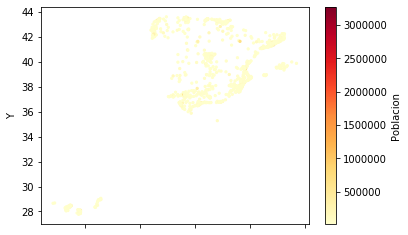

In [16]:
import matplotlib.pyplot as plt

df.plot.scatter(x='X', 
        y='Y', 
        c = 'Poblacion',
        colormap='YlOrRd',
        s = 5)

11) Hacer un gráfico equivalente pero para las diferentes provincias. Seleccionar un punto representativo de las ciudades incluidas en cada provincia.

/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


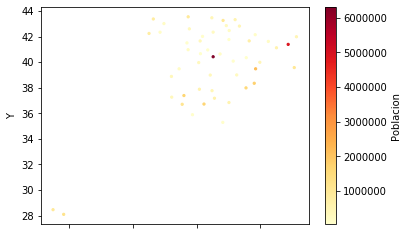

In [17]:
# Agrupo por provincia, y me quedo con el Municipio con más población
# (quiero usar sus coordenadas)
df_plot = df.loc[df.groupby('Provincia').Poblacion.idxmax()]

df_plot_2 = df_plot[['Municipio','X','Y']]
df_plot_2['Poblacion'] = df.groupby('Provincia').Poblacion.sum().values

df_plot_2.plot.scatter(x='X', 
        y='Y', 
        c = 'Poblacion',
        colormap='YlOrRd',
        s = 5)

## Series temporales

In [54]:
# Leo el dataset en formato csv

df_prec = pd.read_csv('precip.csv', sep=', ')
df_prec.head()

/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,YYYYMMDD,000012,000013,000014,000015,000016,000017,000021,000028,000029,...,002062,002762,003919,003946,003991,003994,004002,004004,005585,007682
0,2000-01-01,0.0,3.8,3.7,13.4,7.3,1.0,0.0,3.1,0.1,...,27.5,2.6,0.0,0.0,0.9,1.2,1.5,1.1,4.8,0.4
1,2000-01-02,0.0,0.0,0.0,3.9,1.6,0.8,0.8,6.6,4.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,5.0,7.8
2,2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.8,...,0.0,0.0,0.0,0.0,0.1,8.1,0.0,0.0,1.6,2.1
3,2000-01-04,0.0,0.0,2.0,1.1,0.4,10.9,0.0,1.7,7.6,...,0.7,0.2,0.0,0.0,3.2,4.6,6.5,2.3,0.0,0.4
4,2000-01-05,0.0,0.0,1.3,1.7,0.0,0.0,0.0,0.1,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.2,1.3,0.1


In [55]:
# Leo el dataset en formato stn

df_stn = pd.read_csv('precip.stn', sep=', ')
df_stn.head()

/home/nicolo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,station_id,name,longitude,latitude,altitude,source
0,12,GRAZ,15.45,47.0831,366,ECA&D
1,13,INNSBRUCK,11.40,47.2667,577,ECA&D
2,14,SALZBURG,13.00,47.8000,437,ECA&D
3,15,SONNBLICK,12.95,47.0500,3106,ECA&D
4,16,WIEN,16.35,48.2331,198,ECA&D


1) Obtener y exportar en csv los datos asociados a las series mensuales, estacionales y anuales

In [56]:
# Converto la primera columna a formato datetime
df_prec['YYYYMMDD']=pd.to_datetime(df_prec['YYYYMMDD'].astype(str), format='%Y-%m-%d')

# Creo las columnas año, mes y estación
df_prec['year'] = pd.DatetimeIndex(df_prec['YYYYMMDD']).year
df_prec['month'] = pd.DatetimeIndex(df_prec['YYYYMMDD']).month
# https://stackoverflow.com/questions/44124436/python-datetime-to-season/44124490
df_prec['season'] = ((pd.DatetimeIndex(df_prec['YYYYMMDD']).month) % 12 + 3) // 3

df_prec.head()

,YYYYMMDD,000012,000013,000014,000015,000016,000017,000021,000028,000029,...,003946,003991,003994,004002,004004,005585,007682,year,month,season
0,2000-01-01,0.0,3.8,3.7,13.4,7.3,1.0,0.0,3.1,0.1,...,0.0,0.9,1.2,1.5,1.1,4.8,0.4,2000,1,1
1,2000-01-02,0.0,0.0,0.0,3.9,1.6,0.8,0.8,6.6,4.4,...,0.0,0.0,0.0,0.1,0.0,5.0,7.8,2000,1,1
2,2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.8,...,0.0,0.1,8.1,0.0,0.0,1.6,2.1,2000,1,1
3,2000-01-04,0.0,0.0,2.0,1.1,0.4,10.9,0.0,1.7,7.6,...,0.0,3.2,4.6,6.5,2.3,0.0,0.4,2000,1,1
4,2000-01-05,0.0,0.0,1.3,1.7,0.0,0.0,0.0,0.1,0.3,...,0.0,0.0,0.0,3.5,0.2,1.3,0.1,2000,1,1


In [57]:
# Creo un multi-indice 
index = pd.MultiIndex.from_frame(df_prec[['year', 'season', 'month']], names=['year', 'season', 'month'])

df_prec.set_index(index, inplace = True)

df_prec.drop(columns=['YYYYMMDD', 'year', 'season', 'month'], inplace = True)
df_prec


000012  000013  000014  000015  000016  000017  000021  \
year season month                                                           
2000 1      1         0.0     3.8     3.7    13.4     7.3     1.0     0.0   
            1         0.0     0.0     0.0     3.9     1.6     0.8     0.8   
            1         0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            1         0.0     0.0     2.0     1.1     0.4    10.9     0.0   
            1         0.0     0.0     1.3     1.7     0.0     0.0     0.0   
...                   ...     ...     ...     ...     ...     ...     ...   
2010 1      12        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            12        0.0     4.1     0.0     3.5     0.0     0.3     0.0   
            12        0.0     0.0     1.5     3.7     0.0     0.0     0.0   
            12        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
            12        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                   000028  000029  000030  ...  002062  002762  003919  \
year season month                          ...                           
2000 1      1         3.1     0.1     0.7  ...    27.5     2.6     0.0   
            1         6.6     4.4     3.6  ...     0.0     0.0     0.0   
            1         0.1     1.8     0.7  ...     0.0     0.0     0.0   
            1         1.7     7.6     4.4  ...     0.7     0.2     0.0   
            1         0.1     0.3     0.1  ...     0.0     0.0     0.0   
...                   ...     ...     ...  ...     ...     ...     ...   
2010 1      12        0.2     1.1     0.0  ...    15.0     0.0     0.0   
            12        0.0     0.1     0.0  ...     0.2     1.1     0.0   
            12        0.0     0.0     0.0  ...     0.0     0.0     0.0   
            12        6.9     3.1     0.4  ...     0.0     0.0     0.0   
            12        0.6     1.5     0.3  ...     0.0     0.0     0.3   

                   003946  003991  003994  004002  004004  005585  007682  
year season month                                                          
2000 1      1         0.0     0.9     1.2     1.5     1.1     4.8     0.4  
            1         0.0     0.0     0.0     0.1     0.0     5.0     7.8  
            1         0.0     0.1     8.1     0.0     0.0     1.6     2.1  
            1         0.0     3.2     4.6     6.5     2.3     0.0     0.4  
            1         0.0     0.0     0.0     3.5     0.2     1.3     0.1  
...                   ...     ...     ...     ...     ...     ...     ...  
2010 1      12        0.0     0.0     1.4     0.0     0.0     NaN     0.0  
            12        0.0     0.0     0.0     8.6     0.0     NaN     0.0  
            12        0.0     0.0     0.0     0.2     0.0     NaN     0.0  
            12        3.1     0.0     0.5     0.0     0.0     NaN     3.0  
            12        0.0     0.0     0.0     0.0     0.2     NaN     0.0  

[4018 rows x 86 columns]

In [58]:
# Quiero la media de la precipitaciones cuando voy a agrupar

# Agrupo por año
df_prec.groupby('year').mean().to_csv('prec_year.csv')
df_year = pd.read_csv('prec_year.csv', index_col = 'year')
df_year.head()

,000012,000013,000014,000015,000016,000017,000021,000028,000029,000030,...,002062,002762,003919,003946,003991,003994,004002,004004,005585,007682
year,,,,,,,,,,,,,,,,,,,,,
2000,2.063661,3.148087,3.184973,6.173497,1.468579,2.716867,1.979781,1.930055,1.736612,1.766120,...,0.799180,2.065027,0.699180,1.114208,1.802459,1.202186,5.373770,1.764481,3.345902,1.847541
2001,1.622192,2.451657,3.600000,5.793699,1.434795,3.482263,2.307671,1.941644,1.635068,1.491781,...,1.096986,2.392055,0.965205,0.883836,1.892055,1.537534,5.457808,2.138630,2.289863,1.676986
2002,2.634807,2.516712,3.812603,5.587879,2.228767,3.561671,2.956712,1.092329,1.406849,1.315068,...,1.179726,2.689315,1.528219,1.244384,2.131507,1.686849,5.384110,2.601644,2.124384,1.218630
2003,1.833518,2.165205,2.611781,5.205205,1.224384,2.110465,1.689041,1.571507,1.735890,1.309863,...,0.959452,1.551507,1.198356,1.186849,1.228493,1.255890,3.331781,1.226027,1.912055,1.321918
2004,2.478512,2.229781,3.101639,5.860548,1.824658,2.768227,2.694536,2.263934,1.866940,1.630874,...,1.843169,1.800000,1.111749,1.257923,1.685792,1.540710,4.000273,1.793443,2.132240,1.723224


In [59]:
# Agrupo por mes
df_prec.groupby('month').mean().to_csv('prec_month.csv')
df_month = pd.read_csv('prec_month.csv', index_col = 'month')
df_month.head()

,000012,000013,000014,000015,000016,000017,000021,000028,000029,000030,...,002062,002762,003919,003946,003991,003994,004002,004004,005585,007682
month,,,,,,,,,,,,,,,,,,,,,
1,0.784071,1.180059,1.616716,4.659824,1.506745,2.271959,1.546041,1.704985,1.474487,1.192669,...,1.169501,1.632845,1.219062,0.956598,1.486804,1.075953,3.013490,1.694428,2.191935,1.307331
2,0.830547,1.275563,1.668810,5.171383,1.486774,2.519343,1.492283,1.169132,1.131833,1.021865,...,1.070740,2.122508,1.262058,1.328939,1.635691,1.082315,3.603859,1.604823,1.396466,1.066559
3,1.310294,1.953079,2.882111,6.416176,2.070088,2.423649,1.899413,1.141935,0.971261,0.792962,...,1.225513,2.057771,0.864809,1.068915,1.488563,0.947801,4.717009,1.873900,1.308387,0.880645
4,1.547866,1.780000,2.410303,5.489058,1.238788,1.798258,2.448182,1.031212,0.928182,1.113939,...,1.029394,1.447576,1.195758,1.250000,1.330909,0.925152,3.266061,1.403333,1.790741,0.914848
5,2.895894,2.497654,3.941642,5.323167,2.353079,2.279868,2.121994,1.338123,1.541349,1.485044,...,1.273314,2.578592,1.425806,1.300880,2.205572,1.734897,4.780059,2.127566,2.100000,1.529032


In [60]:
# Agrupo por estación
df_prec.groupby('season').mean().to_csv('prec_season.csv')
df_season = pd.read_csv('prec_season.csv', index_col = 'season')
df_season.head()

,000012,000013,000014,000015,000016,000017,000021,000028,000029,000030,...,002062,002762,003919,003946,003991,003994,004002,004004,005585,007682
season,,,,,,,,,,,,,,,,,,,,,
1,1.035996,1.291339,1.727492,4.930816,1.480141,2.426166,1.754683,1.585599,1.382679,1.08006,...,1.180363,1.939678,1.447432,1.230312,1.532125,1.120846,3.226586,1.680967,1.854472,1.172004
2,1.923389,2.080138,3.085277,5.745149,1.894368,2.171896,2.153360,1.171937,1.149308,1.13083,...,1.177668,2.034289,1.161759,1.206126,1.678755,1.205632,4.265119,1.805929,1.717113,1.110277
3,4.218119,3.934783,5.111462,5.688328,2.544269,3.079702,2.855632,2.227273,2.391996,2.22915,...,1.368874,2.441798,0.358399,0.330138,2.266996,1.907115,6.595751,2.391008,3.113647,2.080534
4,2.177000,2.261222,2.889910,5.096603,1.582917,2.470690,2.790909,2.201099,1.807692,1.48012,...,1.467632,1.978521,1.967932,1.566933,1.595105,1.758741,3.912488,1.592907,2.826496,1.620480


2) Dibujar la serie temporal asociada al promedio espacial de los datos mensuales, estacionales y anuales.

(0, 3.5)

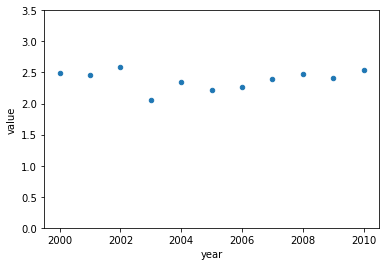

In [61]:
# Por cada año (mes, estación) hago el promedio de todas las filas y lo dibujo

# Por año
frame = {'year': df_year.mean(axis=1).index, 'value': df_year.mean(axis=1).values }   
df_plot = pd.DataFrame(frame) 
my_plot = df_plot.plot.scatter(x='year', y = 'value')
my_plot.set_ylim([0,3.5])

(0, 3.5)

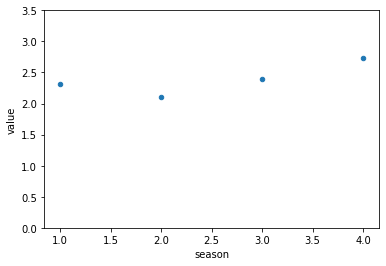

In [62]:
# Por estación
frame = {'season': df_season.mean(axis=1).index, 'value': df_season.mean(axis=1).values }   
df_plot = pd.DataFrame(frame) 
my_plot = df_plot.plot.scatter(x='season', y = 'value')
my_plot.set_ylim([0,3.5])

(0, 3.5)

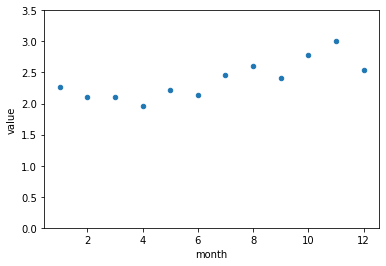

In [63]:
# Por mes
frame = {'month': df_month.mean(axis=1).index, 'value': df_month.mean(axis=1).values }   
df_plot = pd.DataFrame(frame) 
my_plot = df_plot.plot.scatter(x='month', y = 'value')
my_plot.set_ylim([0,3.5])

3) Dibujar la distribución espacial de las estaciones, así como los valores promedio y máximo.

In [64]:
# Hago un merge del data-frame de precipitaciones
# y del data-frame de estaciones

# Como primera cosa, preparo el data-frame de precipitaciones,
# poniendo el ID de las estaciones como columna
df_prec_2 = pd.read_csv('precip.csv')
df_prec_t = df_prec_2.T

headers = df_prec_t.iloc[0]
df_prec_t2  = pd.DataFrame(df_prec_t.values[1:], columns=headers)
df_prec_t2['station_id'] = pd.to_numeric(df_prec_t.index[1:])
#df_stn['station_id'].values#.astype(float) 

# Ahora puedo hacer el merge
df_merge = pd.merge(df_prec_t2, df_stn, on='station_id')

In [67]:
# Transformo las columnas con los valores de precipitaciones
# a float (aparecen como objetos)
df_merge.iloc[:,0:-7] = df_merge.iloc[:,0:-7].astype(float) 

In [68]:
# añado las columnas mean y max
df_stn['mean'] = df_merge.iloc[:,0:-7].mean(axis=1).values
df_stn['max'] = df_merge.iloc[:,0:-7].max(axis=1).values

In [69]:
df_stn

,station_id,name,longitude,latitude,altitude,source,mean,max
0,12,GRAZ,15.4500,47.0831,366,ECA&D,2.346544,70.9
1,13,INNSBRUCK,11.4000,47.2667,577,ECA&D,2.398132,60.5
2,14,SALZBURG,13.0000,47.8000,437,ECA&D,3.212173,101.5
3,15,SONNBLICK,12.9500,47.0500,3106,ECA&D,5.369083,59.5
4,16,WIEN,16.3500,48.2331,198,ECA&D,1.878660,77.1
...,...,...,...,...,...,...,...,...
81,3994,ARKONA,13.4367,54.6817,42,ECA&D,1.499527,65.6
82,4002,OBERSTDORF,10.2767,47.3989,806,ECA&D,4.508738,121.7
83,4004,REGENSBURG,12.1031,49.0433,365,ECA&D,1.869754,56.6
84,5585,SALEN,13.2600,61.1700,360,ECA&D,2.363854,67.5


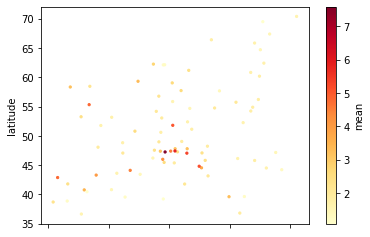

In [72]:
# Ahora puedo hacer el plot (mean)
df_stn.plot.scatter(x='longitude', 
        y='latitude', 
        c = 'mean',
        colormap='YlOrRd',
        s = 5)

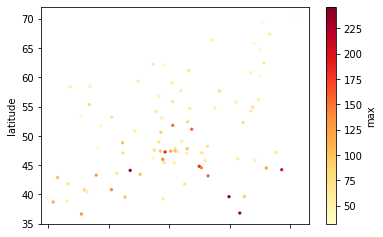

In [71]:
# Ahora puedo hacer el plot (max)
df_stn.plot.scatter(x='longitude', 
        y='latitude', 
        c = 'max',
        colormap='YlOrRd',
        s = 5)

4) Calcular la frecuencia de días con precipitaciones mayores (>) de 1 mm.

In [119]:
# Cuento cuantas entradas del data-frame (por cada linea)
# tienen un valor superior a 0.1
df_stn['rainy_days'] = df_merge.iloc[:,0:-7][df_merge.iloc[:,0:-7] > 0.1].count(axis = 1).values

n_obs = len(df_merge.iloc[:,0:-7].columns)
df_stn['rain_freq'] = df_stn['rainy_days'] / n_obs

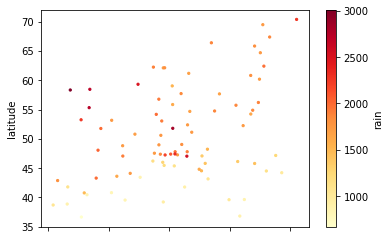

In [120]:
# Añado el plot
df_stn.plot.scatter(x='longitude', 
        y='latitude', 
        c = 'rain',
        colormap='YlOrRd',
        s = 5)